<a href="https://colab.research.google.com/github/davidnoone/PHYS332_FluidExamples/blob/main/03_ShallowWaterWave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shallow water equation in 1d
Consider the of a water surface as $z = H + \eta$, where $H$ is the (constant) mean depth relative to a reference height at z=0. We may altunatievly write surface pertubation in terms of the depth of the water column as $\eta = h + \eta_b$, where the bottom topogarph is known.

Mass continuity in 1d requires:

$$
\frac{\partial h}{\partial t} + \frac{\partial (hu)}{\partial x}  = 0 
                                                                \tag{1}
$$

Where u is the depth integrated (mean) velocity, and is goverened by the (vertically integrated) momentum equation. 

$$
\frac{\partial u}{\partial t} = -u\frac{\partial u}{\partial x}
   -g \frac{\partial \eta}{\partial x} 
                                                                \tag{2}
$$



*italicized text*



# Linearized case

We write the quantities h and u as a mean and deviation from the mean. $h = H + h'$ and $u' = u$, where we assume the mean velocity $U=0$. Substituting into equation 1 and 2, 

$$
\frac{\partial h'}{\partial t} + H \frac{\partial u}{\partial x}  = 0 
                                                                \tag{3}
$$
and
$$
\frac{\partial u}{\partial t} +  g \frac{\partial h'}{\partial x} = 0
                                                                 \tag{4}
$$

Recalling $\eta' = h' + \eta_b$ and noting that we assume $h' << H$ such that $h' + H \approx H$ and that with the fluid velocity u' is small produces involving products such as $u'u'$ can be neglected (i.e., linearlized).

Taking $\partial/\partial t$ of (5) and $\partial/\partial x$ (6) reaveals a common cross term ($\partial^2 u/\partial x\partial t$) which may be elliminated to give

$$
\frac{\partial^2 h'}{\partial t^2} 
        + c^2 \frac{\partial^2 h'    }{\partial x^2} = 0
                                                      \tag{5}
$$

where $c^2 = gH$. Equation (7) takes the form of a wave equation with a wave phase speed given by c. For this linearized case, the phase speed depends only on the mean water depth. 


##A numerical solution

We may immediately write down a finite difference analog for equation (5). 

$$
\frac{h_i^{n-1} - 2h_i^{n} + h_i^{n+1}}{(2\Delta t)^2} = 
    c^2 \frac{h_{i-1}^{n} - 2 h_{i}^{n} + h_{i+1}^{n}}{(2\Delta x)^2}
$$

Where the prime has been dropped for clarity. Writing the courant number as 
$$
r = c \frac{\Delta t}{\Delta x} 
$$

we may rearrange to give a prediction equation
$$
   h_i^{n+1} = (2 h_i^{n} - h_i^{n-1}) +
     r^2 (h_{i-1}^{n} - 2 hi_{i}^{n} + h_{i+1}^{n})
$$

The first term on the right can be viewed as a first order extrapolation to time $n+1$, with the remainder like a correction that updates based on the gradient at the centered time $n$. Some final algebra into final form gives

$$
   h_i^{n+1} = 2(1-r^2) h_i^{n} - h_i^{n-1} 
               + r^2 (h_{i-1}^{n} + h_{i+1}^{n})
                                                  \tag{8}
$$


This system is stable for $r < 1$.

In [25]:
from matplotlib import rc
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
print("Imported all the modules")

Imported all the modules


In [26]:
# Define the problem dimensions
tmax  = 10
dtime = 0.02                #time increment
nsteps = int(tmax/dtime) + 1
nskip  = 5                # steps between output frames

# Space domain
xmin = -5.0
xmax =  5.0               
dx = 0.05                 # grid size
nx     = int((xmax-xmin)/dx) + 1    #number of points on x grid

xpts = np.linspace(xmin,xmax,nx)
print('nx=',nx,'nsteps=',nsteps)

hbar = 1.0
gravity = 1.0

cspd    = hbar*gravity       # phase speed csq = g*H for shallow water
cno = cspd*dtime/dx


print('Courant number:',cno)
if (abs(cno) > 1.0):
    print('WARNING CNO IS UNSTABLE - prepare to die')

rsq = cno**2
twomr2 = 2*(1-rsq)

# initialize main state array
h = np.zeros((nsteps,nx))

# Initial conditions - set as a Gaussian
print("initial conditions")
xw = 0.5            # width
x0 = 0.0         # center location
h[0,:] = np.exp( -((xpts-x0)**2)/(xw*xw))
h[1,:] = h[0,:]             # First step is explicit forward.

# Integrate the wave equation
print("integrating: nsteps=",nsteps)
for n in range(1,nsteps-1):
    for i in range(0,nx):
        # Reflective boundary conditions
        ip = i+1 if i < nx-1 else i-1
        im = i-1 if i > 0    else i+1

#        # Periodic boundary conditions
#        ip = i+1 if i < nx-1 else i+1-nx
#        im = i-1 if i > 0    else i-1+nx

        # This is equation (8) 
        h[n+1,i] = twomr2*h[n,i] - h[n-1,i] + rsq*(h[n,im]+h[n,ip]) 

print('Integration complete')

nx= 201 nsteps= 501
Courant number: 0.39999999999999997
initial conditions
integrating: nsteps= 501
Integration complete


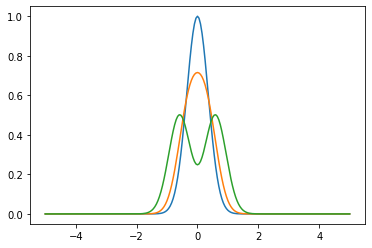

In [27]:
# Plot first few frames. Is it working?
plt.plot(xpts,h[0,:])
plt.plot(xpts,h[3*nskip,:])
plt.plot(xpts,h[6*nskip,:])

The output has been stored in a single (nsteps, nx) array. We can work over the array to generate plots for each time to make an animation.

In [28]:
# initialization function: plot the background of each frame
def init_frame():
    print("INIT called")
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def plot_frame(i):
    line.set_data(xpts, h[i*nskip,:])
    return line,

In [29]:
# First set up the figure, the axis, and the plot elements we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(xmin, xmax),ylim=[-0.1,1.1])
line, = ax.plot([], [], lw=2)

nframes = int(nsteps/nskip)+1
anim = animation.FuncAnimation(fig, plot_frame, init_func=init_frame, frames=nframes, 
                                interval=20,blit=True,repeat=True)
plt.close()

# instantiate the animation for in line JS HTML
rc('animation', html='jshtml')
print("Rendering, please wait...")
anim


INIT called
Rendering, please wait...
INIT called


##Variable depth
The phase speed depends on depth $c^2 = gH$, and the water depth may not be constant. i.e., $H = H(x)$. While it is possible to account for this within the original (non-linear) equatons, we can also account for it in the linear equations, by considering the problem of a wave equatin with the variable coefficient. 

$$
   \frac{\partial^2 h}{\partial t^2} = \
      g \frac{\partial }{\partial x} \left(
          H(x) \frac{\partial h}{\partial x} 
        \right)
$$


Following the example above, we may immediately write down the finite difference analog for this equation. Care, however, is needed to evaluate the term in brackets at the same time. Specifically, the $F = H \partial h/\partial x$ is a quantity that needs to be evaluated at the same grid location. This is most naturally done at grid "half points", denoted by local $i+1/2$, etc. In general, H might be some analytic function, or come from some external data source, and it can be specified at these locations. 

Let us write this term as "F"
$$ 
  F_{i+1/2} = H_{i-1/2} \left( \frac{h_{i+1} - h{i}}{\Delta x} \right)
$$


And then


$$
\frac{h_i^{n-1} - 2h_i^{n} + h_i^{n+1}}{(2\Delta t)^2} = 
    g \frac{F_{i+1/2} -  F_{i-1/2}} {\Delta x}
$$

And using the definition of F, 

$$
\frac{h_i^{n-1} - 2h_i^{n} + h_i^{n+1}}{(2\Delta t)^2} = 
    \frac{g}{(\Delta x)^2} \left[
            H_{i+1/2} ( h_{i+1}^n - h_{i}^n ) 
         -  H_{i-1/2} ( h_{i}^n - h_{i-1}^n )
                       \right]
$$


Finally,we may rearrange to give a prediction equation
$$
   h_i^{n+1} = (2 h_i^{n} - h_i^{n-1}) +
     g r^2 \left[
            H_{i+1/2} ( h_{i+1}^n - h_{i}^n ) 
         -  H_{i-1/2} ( h_{i}^n - h_{i-1}^n )
                       \right]
$$

Notice a small detail that for a grid with $N$ cells that have midpoints $i$, there are $N+1$ interfaces that accompany the "half" locations. Therfore the function H must be asisgned the $N+1$ values.





In [30]:
# Set up a topography profile.
hamp = 0.0            # "Amplitude" of slope
Hbot = 1 + np.linspace(-hamp,hamp,nx+1)

# Run the model again!
print("integrating: nsteps=",nsteps)
for n in range(1,nsteps-1):
    for i in range(0,nx):
        # Refective boundary conditions
        ip = i+1 if i < nx-1 else i-1
        im = i-1 if i > 0    else i+1

        h[n+1,i] = 2*h[n,i] - h[n-1,i] + gravity*rsq*(Hbot[ip]*(h[n,ip]-h[n,i]) - Hbot[i]*(h[n,i] - h[n,im]))

# Plot the results
fig = plt.figure()
ax = plt.axes(xlim=(xmin, xmax),ylim=[-0.1,1.1])
line, = ax.plot([], [], lw=2)

nframes = int(nsteps/nskip)+1
anim = animation.FuncAnimation(fig, plot_frame, init_func=init_frame, frames=nframes, 
                                interval=20,blit=True,repeat=True)
plt.close()

# instantiate the animation for in line JS HTML
rc('animation', html='jshtml')
print("Rendering, please wait...")
anim

integrating: nsteps= 501
INIT called
Rendering, please wait...
INIT called


# Quuestions

1.   Confirm that the wave speed is dependent on the ocean depth, but it does not depend on the wave amplitude of "width".


2.  Configure the model to represent a tsunami. Consider a 1 meter high wave 1000 km out to sea. How long does it take to reach the shore. The typical depth of the South Atlantic near New Zealand is 1.5 km. 

3. Add a "slope" to the bottom. Confirm that the wave will reach the shore more 
slowly that the speed of the wave out at sea. 
Consider the ocean to have a slope with an amplitude relative to the mean depth.

4. What is the difference in the ampltude of the wave when it reachest the shore?









